<a href="https://colab.research.google.com/github/Svhugani/QOptics/blob/main/HEPLEPNUMv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install qutip

     |████████████████████████████████| 14.6MB 244kB/s 


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import qutip as qt

In [6]:

class QuantumSystem:

  def __init__( self, isBalanced, omega, gamma_1, gamma_3, gSpace, dim):
    
    self.isBalanced = isBalanced
    self.omega = omega
    self.gamma_1 = gamma_1
    self.gamma_3 = gamma_3
    self.dim = dim
    self.gSpace = gSpace

  def SystemMatrix(self, g):
    I = qt.identity(self.dim)
    a1 = qt.tensor(qt.destroy(self.dim),I,I)
    a2 = qt.tensor(I,qt.destroy(self.dim),I)
    a3 = qt.tensor(I,I,qt.destroy(self.dim))

    H = self.omega * (a1.dag() * a1 + a2.dag() * a2 + a3.dag() * a3) + g * (a1.dag() * a2 + a2.dag() * a1 + a2.dag() * a3 + a3.dag() * a2 )
    L = -1.0j * (qt.spre(H) - qt.spost(H))

    if self.isBalanced:
      L += self.gamma_1 * qt.lindblad_dissipator(a1)
      L += self.gamma_1 * qt.lindblad_dissipator(a3.dag())
    
    else:
      L += self.gamma_1 * qt.lindblad_dissipator(a1)
      L += self.gamma_3 * qt.lindblad_dissipator(a3)

    return [H, L]

  def PlotSystemOfGspace(self, isHamiltionian, isRealPart):
    
    Energies = []

    if isHamiltionian:
      refInd = 0
    else:
      refInd = 1
    
    for gPoint in self.gSpace:
      system = self.SystemMatrix(gPoint)
      Energies.append(system[refInd].eigenenergies())
    
    Energies = np.array(Energies)

    if isRealPart:
      title = "Real"
      Energies = np.real(Energies)
    
    else:
      title = "Imaginary"
      Energies = np.imag(Energies)

    plt.subplots(figsize=(15,10))
    
    for i in range(len(Energies[0])):
    #for i in range(5,10):
      Y = Energies[ : , i ]
      plt.plot(self.gSpace, Y, label = "eig " + str(i), linestyle = "dotted", linewidth = 3)

    plt.legend()
    plt.title(str(title) + " parts of eigenvalues versus g / omega")
    plt.grid()
    plt.show()



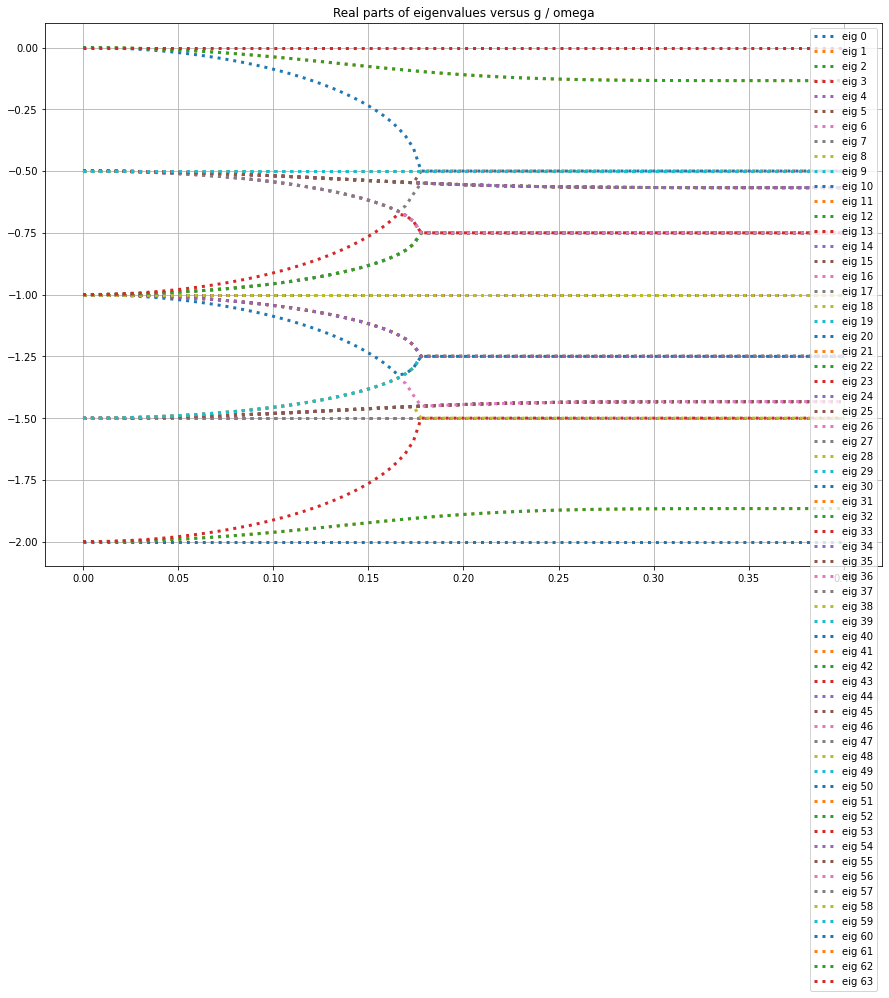

In [7]:
isBalanced = True
isHamiltonian = False
isRealPart = True
subsystemDim = 2

QS = QuantumSystem(isBalanced, 1, 1, 0.5, np.linspace(0, 0.4, 100), subsystemDim)
QS.PlotSystemOfGspace(isHamiltonian, isRealPart)

In [91]:

class QuantumSystem:

  def __init__( self, isBalanced, omega, gamma_1Space, gamma_3, g, dim):
    
    self.isBalanced = isBalanced
    self.omega = omega
    self.gamma_1Space = gamma_1Space
    self.gamma_3 = gamma_3
    self.dim = dim
    self.g = g

  def SystemMatrix(self, gamma_1):
    I = qt.identity(self.dim)
    a1 = qt.tensor(qt.destroy(self.dim),I,I)
    a2 = qt.tensor(I,qt.destroy(self.dim),I)
    a3 = qt.tensor(I,I,qt.destroy(self.dim))

    H = self.omega * (a1.dag() * a1 + a2.dag() * a2 + a3.dag() * a3) + self.g * (a1.dag() * a2 + a2.dag() * a1 + a2.dag() * a3 + a3.dag() * a2 )
    L = -1.0j * (qt.spre(H) - qt.spost(H))

    if self.isBalanced:
      L += gamma_1 * qt.lindblad_dissipator(a1)
      L += gamma_1 * qt.lindblad_dissipator(a3.dag())
    
    else:
      L += gamma_1 * qt.lindblad_dissipator(a1)
      L += self.gamma_3 * qt.lindblad_dissipator(a3)

    return [H, L]

  def PlotSystemOfGspace(self, isHamiltionian, isRealPart):
    
    Energies = []

    if isHamiltionian:
      refInd = 0
    else:
      refInd = 1
    
    for gamma_1 in self.gamma_1Space:
      system = self.SystemMatrix(gamma_1)
      Energies.append(system[refInd].eigenenergies())
    
    Energies = np.array(Energies)

    if isRealPart:
      title = "Real"
      Energies = np.real(Energies)
    
    else:
      title = "Imaginary"
      Energies = np.imag(Energies)

    colPlots = 4
    plotsPerSubPlot = 4 
    rowPlots = len(Energies[0]) / (colPlots * plotsPerSubPlot)  
    fig = plt.figure()
    fig.set_size_inches(30, 30)
    iterator = 0

    for i in range(len(Energies[0])):
      Y = Energies[ : , i ]

      if (i % plotsPerSubPlot == 0):
        iterator += 1
        ax = fig.add_subplot(rowPlots, colPlots, iterator)
        ax.grid()

      line = ax.plot(self.gamma_1Space, Y, linestyle = "solid", linewidth = 2 ,label = "eig" + str(i))  

    fig.legend()
    fig.suptitle(str(title) + " parts of eigenvalues versus gamma_1 / g", fontsize=16)
    plt.show()

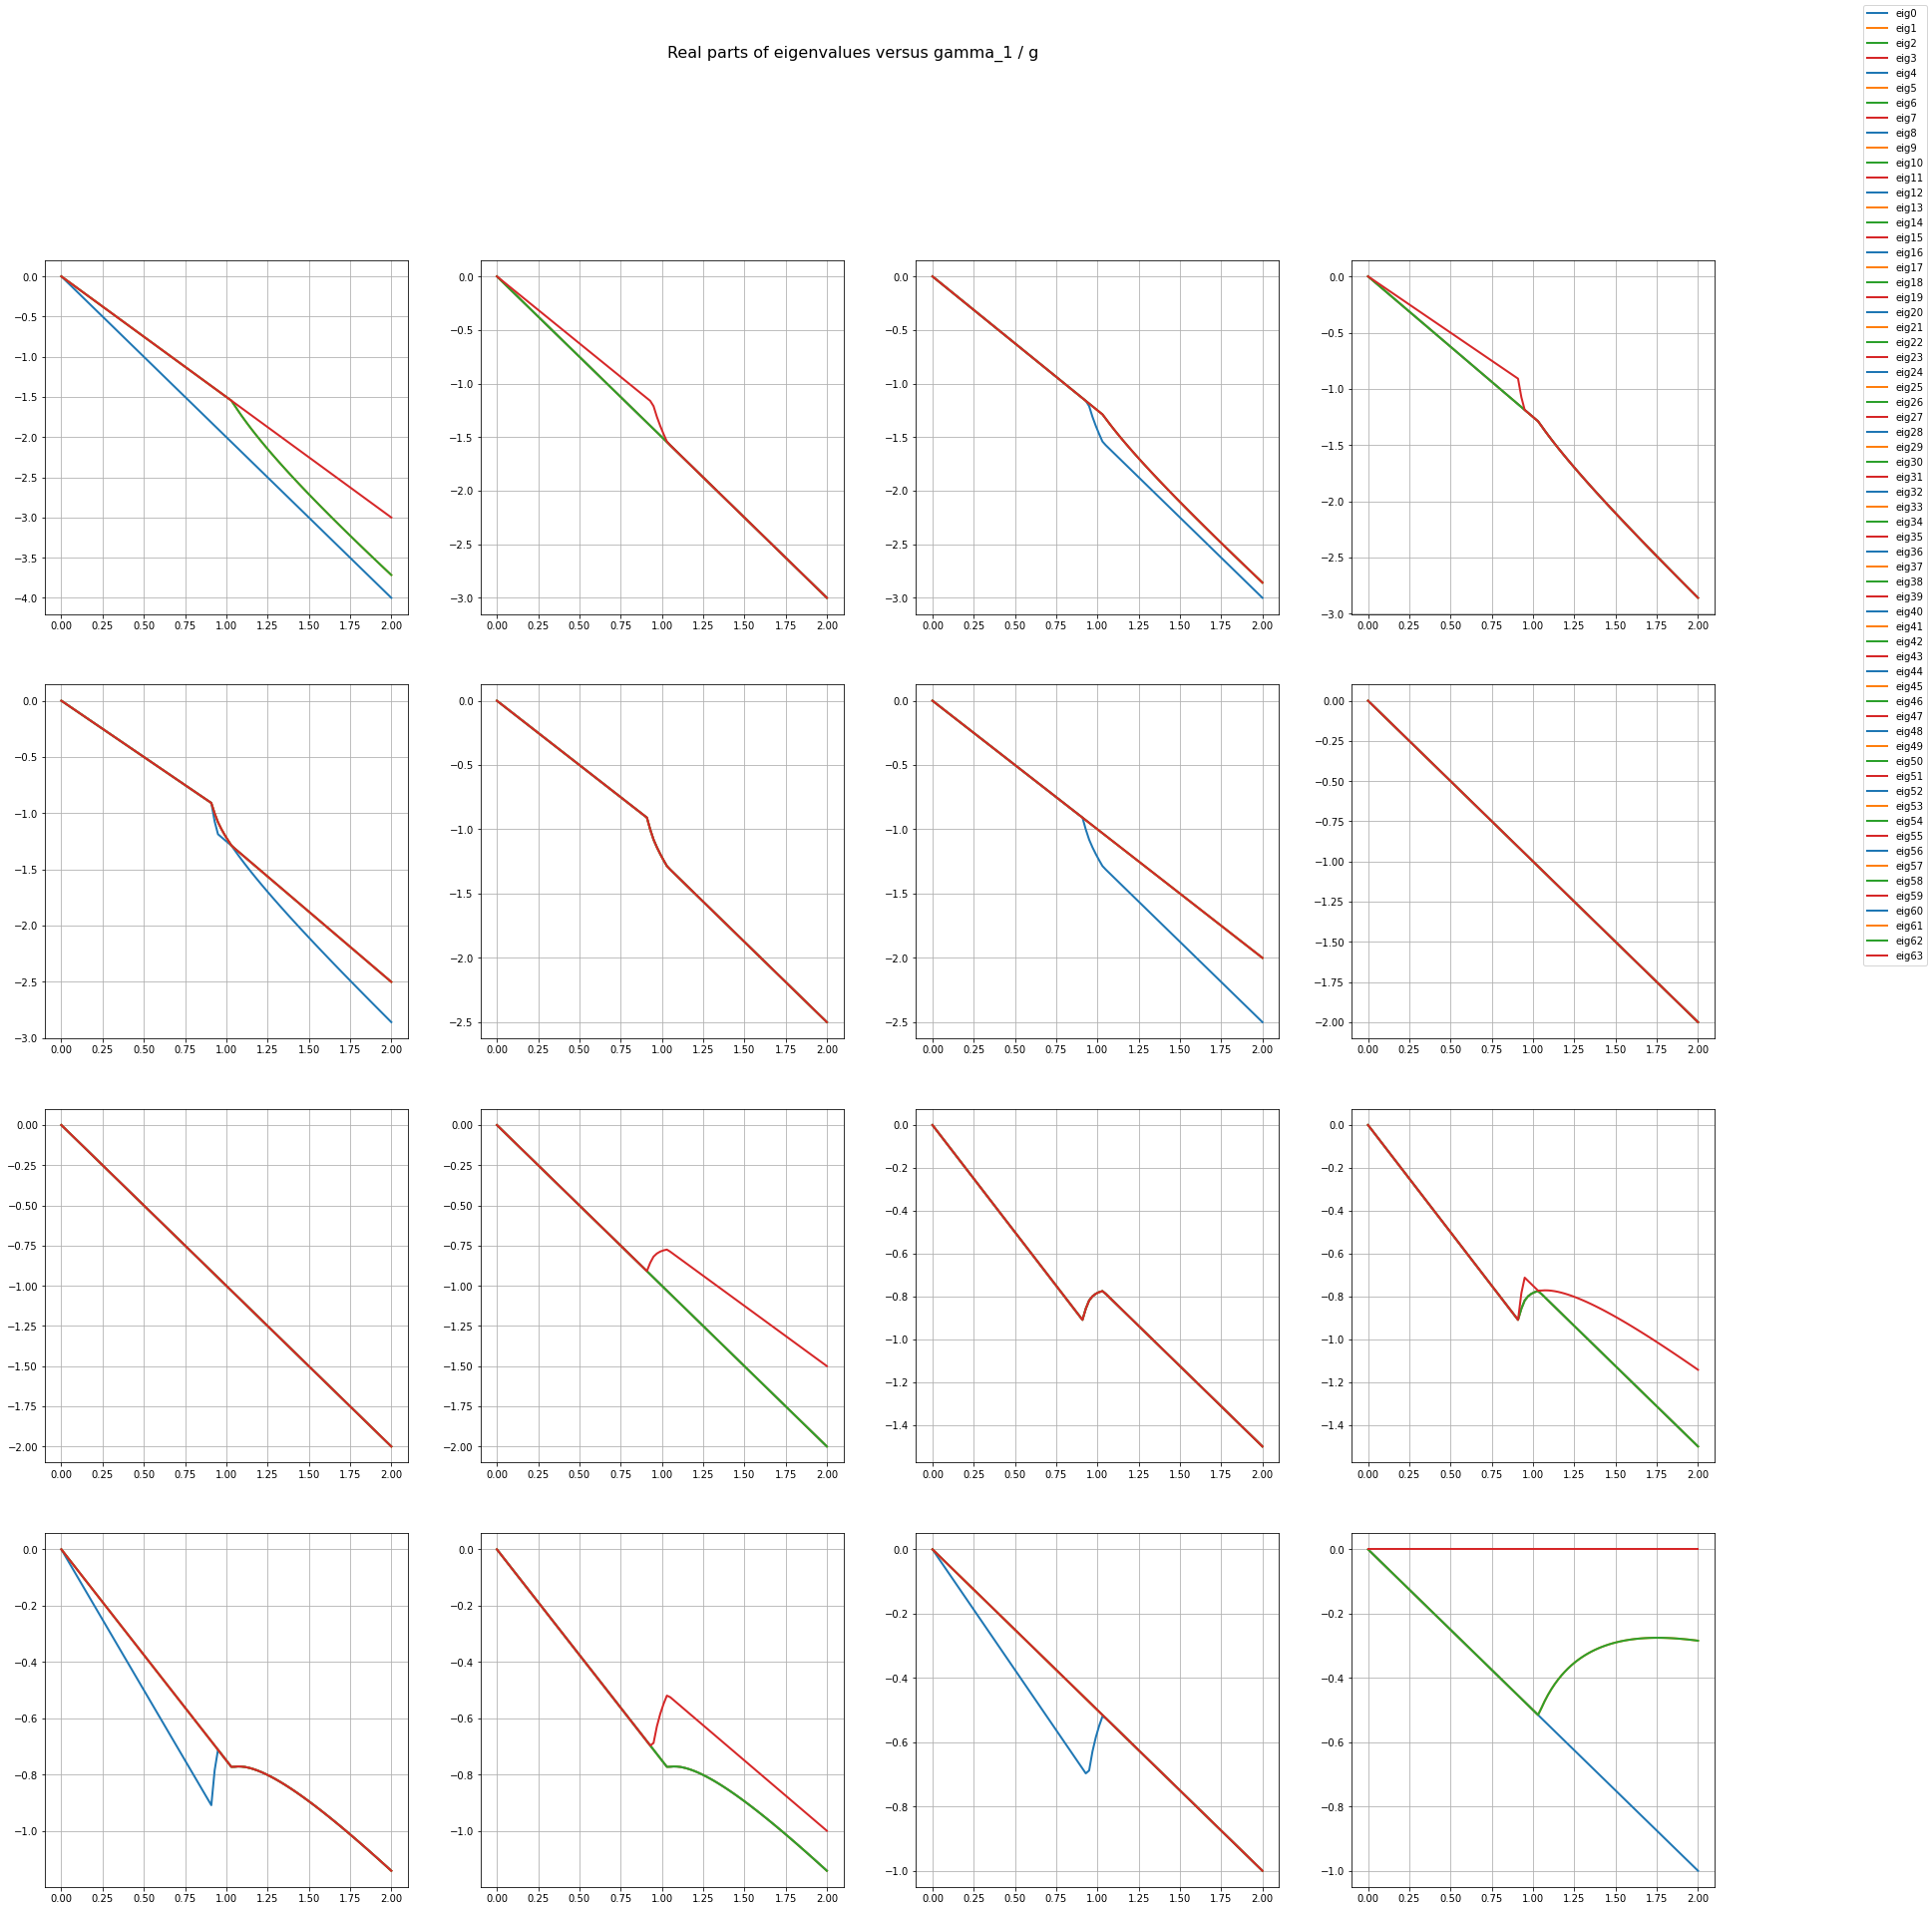

In [92]:
isBalanced = True
isHamiltonian = False
isRealPart = True
subsystemDim = 2

g = 1
omega = 5 * g
gamma_3 = 2.5 * g
gamma_1Space = np.linspace(0, 2, 100)


QS = QuantumSystem(isBalanced, omega, gamma_1Space, gamma_3, g, subsystemDim)
QS.PlotSystemOfGspace(isHamiltonian, isRealPart)

In [22]:
int(4/3)

1